# Introduction to Convolutional Neural Networks and Computer Vision

Getting the data

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the download file
zip_dir = zipfile.ZipFile("pizza_steak.zip")
zip_dir.extractall()
zip_dir.close()

--2023-10-08 06:23:40--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.207, 172.253.118.207, 74.125.200.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  22.8MB/s    in 5.8s    

2023-10-08 06:23:46 (18.2 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
!ls pizza_steak/train

pizza  steak


In [3]:
#!ls pizza_steak/train/pizza

In [4]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 0 directories and 250 images in pizza_steak/test/steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 0 directories and 750 images in pizza_steak/train/steak


In [5]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first let's get the class names programmatically.

In [6]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
# Creates a class for subdirectory
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class
  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)
  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f'Image shape: {img.shape} ') # show the shape of the image

  return img

['2694223.jpg']
Image shape: (512, 512, 3) 


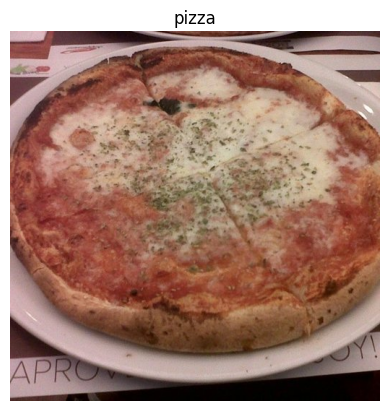

In [8]:
# view a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",target_class="pizza")

In [9]:
#import tensorflow as tf
#tf.constant(img)

In [10]:
# View the image shape
img.shape

(512, 512, 3)

In [11]:
# Get all the pixel values between 0 & 1
# Normalization & Scaling of image
#img/255



*   Load images
*   Preprocess images


*   Build a CNN to find patterns in images
*   Compile our CNN


*   Fit the CNN to our training data







In [12]:
from keras.api._v2.keras import activations
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get pixel values betn 0 & 1)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)


# Create a CNN model (same as Tiny VGG but for binary classification - https://poloclub.github.io/cnn-explainer/ )
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

model = Sequential()
model.add(Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3))) # same input shape as our images
model.add(Conv2D(10, 3, activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(10, 3, activation='relu'))
model.add(Conv2D(10, 3, activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))


# Compile the model
model.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

# Fit the model
history_8 = model.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 20s 169ms/step - loss: 0.6650 - accuracy: 0.5953 - val_loss: 0.5582 - val_accuracy: 0.6960
Epoch 2/5
47/47 [==============================] - 6s 123ms/step - loss: 0.5094 - accuracy: 0.7593 - val_loss: 0.4498 - val_accuracy: 0.7840
Epoch 3/5
47/47 [==============================] - 8s 166ms/step - loss: 0.4604 - accuracy: 0.7807 - val_loss: 0.4468 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 7s 150ms/step - loss: 0.4080 - accuracy: 0.8200 - val_loss: 0.3399 - val_accuracy: 0.8700
Epoch 5/5
47/47 [==============================] - 6s 127ms/step - loss: 0.3470 - accuracy: 0.8613 - val_loss: 0.3632 - val_accuracy: 0.8340


In [13]:
from tensorflow.python import metrics
model_2 = Sequential()
model_2.add(Flatten(input_shape=(224,224,3)))
model_2.add(Dense(100, activation="relu"))
model_2.add(Dense(100, activation="relu"))
model_2.add(Dense(100, activation="relu"))

model_2.add(Dense(1, activation="sigmoid"))

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 123ms/step - loss: 3.3156 - accuracy: 0.5980 - val_loss: 1.9019 - val_accuracy: 0.5240
Epoch 2/5
47/47 [==============================] - 7s 149ms/step - loss: 0.9309 - accuracy: 0.6880 - val_loss: 0.8979 - val_accuracy: 0.6840
Epoch 3/5
47/47 [==============================] - 5s 111ms/step - loss: 0.7906 - accuracy: 0.6953 - val_loss: 0.5046 - val_accuracy: 0.7600
Epoch 4/5
47/47 [==============================] - 7s 142ms/step - loss: 0.6097 - accuracy: 0.7353 - val_loss: 0.4786 - val_accuracy: 0.7600
Epoch 5/5
47/47 [==============================] - 5s 116ms/step - loss: 0.5044 - accuracy: 0.7667 - val_loss: 0.5718 - val_accuracy: 0.7380


In [14]:
model_2.evaluate(valid_data)

16/16 [==============================] - 2s 125ms/step - loss: 0.5718 - accuracy: 0.7380


[0.5717566609382629, 0.7379999756813049]

In [17]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [15]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 126ms/step


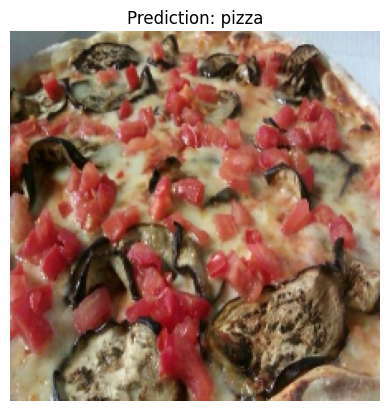

In [18]:

# Test our model on a custom image
pred_and_plot(model_2, "/content/pizza_steak/test/pizza/1032754.jpg", class_names)
